In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

# PH01-00

In [3]:
#read the data from the excel file
df = pd.read_excel('ph0100(preprocessed).xlsx')
# Select only the columns that we want to use: Pressure_ground_truth, Pressure, and Flowrate
df = df[['Pressure_ground_truth', 'Pressure', 'Flowrate']]

In [4]:
# calculate correlation
df[np.array(df.columns)].corr()

,Pressure_ground_truth,Pressure,Flowrate
Pressure_ground_truth,1.000000,0.982269,0.966274
Pressure,0.982269,1.000000,0.959941
Flowrate,0.966274,0.959941,1.000000


Score:  0.9652756605711026
Error:  0.20026397278103839


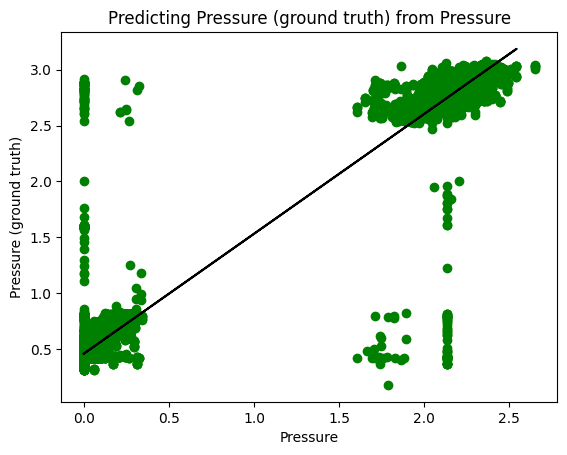

In [5]:
df_binary = df[['Pressure_ground_truth', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)
  
# remove NaN values
df_binary.dropna(inplace = True)
  
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Pressure (ground truth) from Pressure (measured))')
plt.xlabel('Pressure (measured))')
plt.ylabel('Pressure (ground truth)')
plt.show()

Score:  0.9726146191764595
Error:  0.17780830691634916


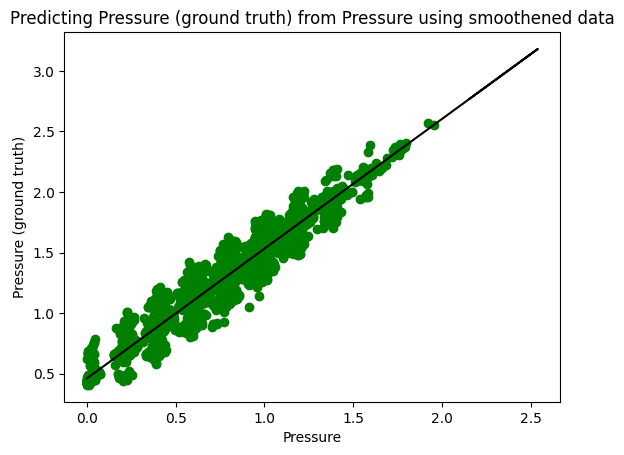

In [9]:
df_binary = df[['Pressure_ground_truth', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Pressure_ground_truth'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 11)
y_train = smooth(y_train, 11)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Pressure (ground truth) from Pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Pressure (ground truth)')
plt.show()

# plot scatter plot of X_train and y_train using plotly
fig = px.scatter(X_train[:,0], y_train[:,0])
fig.update_layout(title='Predicting Pressure (ground truth) from Pressure using smoothened data', xaxis_title='Pressure', yaxis_title='Pressure (ground truth)')
# centre the title
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
df_binary = df[['Pressure', 'Pressure_ground_truth']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Pressure_ground_truth'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
# plt.scatter(X_train, y_train,color='g') 
# plt.plot(X_test, y_pred,color='k') 
# plt.title('Predicting Pressure (ground truth) from Pressure using sampled data')
# plt.xlabel('Pressure')
# plt.ylabel('Pressure(ground truth)')
# plt.show()

# plot using plotly
fig = px.scatter(df_binary, x="Pressure", y="Pressure_ground_truth", hover_data=df_binary.columns)
fig.add_trace(go.Scatter(x=X_test[:,0], y=y_pred[:,0], mode='lines', name='Regression Line'))
fig.update_layout(title='Predicting Pressure (ground truth) from Pressure using sampled data', xaxis_title='Pressure', yaxis_title='Pressure (ground truth)')
# centre the title
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
df_binary = df[['Pressure', 'Pressure_ground_truth']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Pressure_ground_truth'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
# plt.scatter(X_train, y_train,color='g') 
# plt.plot(X_test, y_pred,color='k') 
# plt.title('Predicting Pressure (ground truth) from Pressure using sampled and smoothened data')
# plt.xlabel('Pressure')
# plt.ylabel('Pressure (ground truth)')
# plt.show()

# plot training data using plotly
# fig = px.scatter(x=X_train[:,0], y=y_train[:,0])
fig = px.scatter(df_binary, x="Pressure", y="Pressure_ground_truth", hover_data=df_binary.columns)
fig.add_trace(go.Scatter(x=X_test[:,0], y=y_pred[:,0], mode='lines', name='Regression Line'))
fig.update_layout(title='Predicting Pressure (ground truth) from Pressure (manual) using sampled and smoothened data', xaxis_title='Pressure', yaxis_title='Pressure (ground truth)')
# centre the title
fig.update_layout(title_x=0.5)
fig.show()

# plot training data using plotly
fig = px.scatter(x=X_train[:,0], y=y_train[:,0])
# fig = px.scatter(df_binary, x="Pressure", y="Pressure_ground_truth", hover_data=df_binary.columns)
fig.add_trace(go.Scatter(x=X_test[:,0], y=y_pred[:,0], mode='lines', name='Regression Line'))
fig.update_layout(title='Predicting Pressure (ground truth) from Pressure (manual) using sampled and smoothened data', xaxis_title='Pressure', yaxis_title='Pressure (ground truth)')
# centre the title
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)  

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)
df_binary.head()

X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)  

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Pressure', 'Flowrate']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using sampled data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()


In [ ]:
df_binary = df[['Flowrate', 'Pressure']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using sampled and smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure_ground_truth']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure (ground truth)')
plt.xlabel('Pressure (ground truth)')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure_ground_truth']]

X = np.array(df_binary['Pressure_ground_truth'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure (ground truth) using smoothened data')
plt.xlabel('Pressure (ground truth)')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure_ground_truth']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure_ground_truth'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure_ground_truth using sampled data')
plt.xlabel('Pressure_ground_truth')
plt.ylabel('Flowrate')
plt.show()


In [ ]:
df_binary = df[['Flowrate', 'Pressure_ground_truth']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure_ground_truth'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure_ground_truth using sampled and smoothened data')
plt.xlabel('Pressure_ground_truth')
plt.ylabel('Flowrate')
plt.show()


# PH03-02

In [ ]:
#read the data from the excel file
df = pd.read_excel('ph0302(preprocessed).xlsx')

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting Flowrate from Pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate') 
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using sampled data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)


X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using sampled and smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

# PH03-03

In [ ]:
#read the data from the excel file
df = pd.read_excel('ph0303(preprocessed).xlsx')

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting Flowrate from Pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate') 
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using sampled data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

In [ ]:
df_binary = df[['Flowrate', 'Pressure']]

#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure'])
y = np.array(df_binary['Flowrate'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure using sampled and smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled Pressure")
print("Predicted: sampled Flowrate")